In [18]:
import csv
import requests
import sys
import os
import re
import time
import itertools
import json
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
geneid = []
with open('Disease Causing Genes.csv', 'r') as file:
    reader = csv.reader(file,delimiter=",", skipinitialspace=True)
    result = [[item for item in row if item != ''] for row in reader]
    result.pop(0)
for x in result:
    x = "".join(x)
    geneid.append(x)
print(len(geneid))

2556


In [3]:
#Gets a canonical transcipt id from the gnomad API
def get_ensembl_id(gene_name):
    query = """
    {
        gene(gene_name: "%s") {
        canonical_transcript_id
        }     
    }""" % gene_name
    res = requests.post('https://gnomad.broadinstitute.org/api', json={'query': query})
    if res.ok:
        try:
            return res.json()['data']['gene']['canonical_transcript_id']
        except:
            res = None
    else:
        try:
            res.raise_for_status()
            return "error"
        except requests.exceptions.HTTPError: #I should catch the error too or print, to find out which specific genes
            pass

#Adapted from https://github.com/xjenny2/phospho-programs/blob/master/gnomad.py

In [4]:
#Gets a protein sequence in FASTA format given the ensembl transcript ID
def get_protein_sequence(canonical_transcript):
    server = "http://grch37.rest.ensembl.org"
    ext = "/sequence/id/" + canonical_transcript + "?content-type=text/x-fasta;type=protein"
    r = requests.get(server + ext, headers={"Content-Type": "text/x-fasta"})
    time.sleep(3)
    
    if not r.ok:
        try:
            r.raise_for_status()
            return "error"
        except requests.exceptions.HTTPError: #I should catch the error too or print, to find out which specific genes
            pass
    seqlist = r.text.split("\n", 1)
    
    if len(seqlist) == 2: #A lot of these transcripts are noncoding or introns, don't know why
        sequence = seqlist[1]
        sequence = sequence.replace("\n", "")
        return sequence
    #print("Sequence found")
    else:
        print(canonical_transcript)
    

#Adapted from https://github.com/xjenny2/phospho-programs/blob/master/ensembl.py

In [5]:
canonical_transcript = []
for x in geneid:
    ensembl_id = get_ensembl_id(x)
    canonical_transcript.append(ensembl_id)
print(canonical_transcript)

['ENST00000374736', 'ENST00000261200', 'ENST00000366684', 'ENST00000458208', 'ENST00000331789', 'ENST00000290378', 'ENST00000575842', 'ENST00000366578', 'ENST00000252699', 'ENST00000352511', 'ENST00000388922', 'ENST00000368474', 'ENST00000269143', 'ENST00000395792', 'ENST00000279146', 'ENST00000373176', 'ENST00000356239', 'ENST00000392038', 'ENST00000329255', 'ENST00000520113', 'ENST00000336811', 'ENST00000265709', 'ENST00000357077', 'ENST00000284268', 'ENST00000457016', 'ENST00000236850', 'ENST00000367990', 'ENST00000542499', 'ENST00000233242', 'ENST00000346798', 'ENST00000349830', 'ENST00000358385', 'ENST00000361216', 'ENST00000539276', 'ENST00000393221', 'ENST00000244769', 'ENST00000252934', 'ENST00000377617', 'ENST00000393287', None, 'ENST00000307078', 'ENST00000369085', 'ENST00000258168', 'ENST00000449131', 'ENST00000302334', 'ENST00000259089', 'ENST00000245451', 'ENST00000372037', 'ENST00000440890', 'ENST00000374580', 'ENST00000471181', 'ENST00000259008', 'ENST00000433053', 'ENST

In [6]:
print(len(canonical_transcript))

2556


In [7]:
protein_sequence = []
for x in canonical_transcript:
    if x != None:
        protein_seq = get_protein_sequence(x)
        protein_sequence.append(protein_seq)

print(len(protein_sequence))

ENST00000398840
ENST00000405650
ENST00000607650
ENST00000525719
ENST00000530852
ENST00000413808
ENST00000425829
ENST00000532411
ENST00000327258
2509


In [13]:
final_protein_sequence = []
for x in protein_sequence:
    if x != None:
        final_protein_sequence.append(x)
with open("diseaseSequences.json", 'w') as f:
    json.dump(final_protein_sequence, f, indent=2) 
print(len(final_protein_sequence))

2500


In [10]:
count = 0
for x in canonical_transcript:
    if x == None:
        count +=1
print(count)

47


In [14]:
with open("diseaseSequences.json", 'r') as f:
    protein_sequence = json.load(f)

In [15]:
def metCount(sequence, initial, end, counter, freq_range):
    portion = sequence[initial:end]
    count = 0
    for x in portion:
        if x == 'M':
            count += 1
    
    metCount.freq = count/counter
    freq_range.append(metCount.freq)

In [16]:
ten = []
twenty = []
thirty = []
forty = []
fifty = []
sixty = []
seventy = []
eighty = []
ninety = []
hundred = []

In [19]:
methionine = []
tracker = 0
for x in protein_sequence:
    count = -1 #excludes first met 
    for i in x:
        if i == 'M':
            count += 1
    methionine.append(count)
    if len(x)>10 and count > 0:
        tracker += 1
        sub_seq = math.floor(len(x)/10)
        metCount(x, 1, sub_seq, count, ten)
        metCount(x, sub_seq, 2 * sub_seq, count, twenty)
        metCount(x, (2 * sub_seq) , 3*sub_seq, count, thirty)
        metCount(x, (3*sub_seq) , 4*sub_seq, count, forty)
        metCount(x, (4*sub_seq) , 5*sub_seq, count, fifty)
        metCount(x, (5*sub_seq) , 6*sub_seq, count, sixty)
        metCount(x, (6*sub_seq) , 7*sub_seq, count, seventy)
        metCount(x, (7*sub_seq) , 8*sub_seq, count, eighty)
        metCount(x, (8*sub_seq) , 9*sub_seq, count, ninety)
        metCount(x, (9*sub_seq) , len(x), count, hundred)
print(tracker)

2480


In [20]:
freq = []
labels = ['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x_pos = np.arange(len(labels))

In [21]:
def statGrabber(sequence_range):
    freq.append(np.mean(sequence_range))

In [22]:
statGrabber(ten)
statGrabber(twenty)
statGrabber(thirty)
statGrabber(forty)
statGrabber(fifty)
statGrabber(sixty)
statGrabber(seventy)
statGrabber(eighty)
statGrabber(ninety)
statGrabber(hundred)

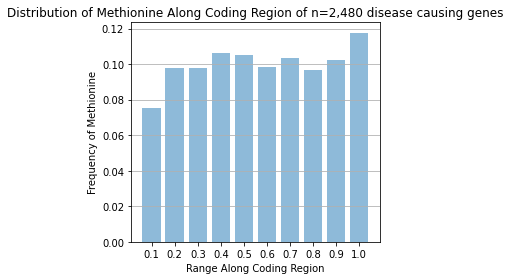

In [25]:
fig, ax = plt.subplots()
ax.bar(x_pos, freq, align = 'center', alpha = 0.5)
ax.set_ylabel('Frequency of Methionine')
ax.set_xlabel('Range Along Coding Region')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Distribution of Methionine Along Coding Region of n=2,480 disease causing genes')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('diseaseDistribution.png')
plt.show()